# Image Classification Using Cifar 10 Dataset

Image classification is a fundamental task in computer vision where a model learns to assign labels to images based on their visual content. It plays a crucial role in applications such as autonomous driving, medical diagnosis, object detection, and facial recognition.

In this project, The CIFAR-10 dataset contains 60,000 images (32×32 pixels, RGB) across 10 classes, with 50,000 training and 10,000 test images.

Classes: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck

To build an effective classifier, I trained a deep learning model using Convolutional Neural Networks (CNNs), which are specifically designed to capture spatial hierarchies in images. CNNs use multiple layers of convolutional filters, pooling layers, and fully connected layers to learn and classify images based on features like edges, textures, and patterns.

Once the model is trained, we evaluate its performance using:
 - Predictions on test images
 - Classification report with precision, recall, and F1-score
 - Confusion matrix (heatmap) to visualize misclassifications
 
This project demonstrates a complete deep learning pipeline, from data preprocessing to model training, evaluation, and visualization, providing insights into how AI can be used for real-world image classification problems.

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train,x_test = x_train/255.0, x_test/255.0

# Model Training 

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']) 

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [7]:
history = model.fit(x_train,y_train_one_hot,epochs = 10,validation_data = (x_test, y_test_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.3316 - loss: 1.7959 - val_accuracy: 0.5521 - val_loss: 1.2534
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5627 - loss: 1.2260 - val_accuracy: 0.6193 - val_loss: 1.0808
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6272 - loss: 1.0495 - val_accuracy: 0.6392 - val_loss: 1.0105
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.6655 - loss: 0.9453 - val_accuracy: 0.6730 - val_loss: 0.9332
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6906 - loss: 0.8770 - val_accuracy: 0.6869 - val_loss: 0.9039
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7133 - loss: 0.8095 - val_accuracy: 0.6748 - val_loss: 0.9411
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.7290 - loss: 0.7680 - val_accuracy: 0.6841 - val_loss: 0.9029
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7450 -

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, verbose = 2)
print(f"Test Accuracy: {test_accuracy}")

313/313 - 3s - 10ms/step - accuracy: 0.7137 - loss: 0.8631
Test Accuracy: 0.713699996471405


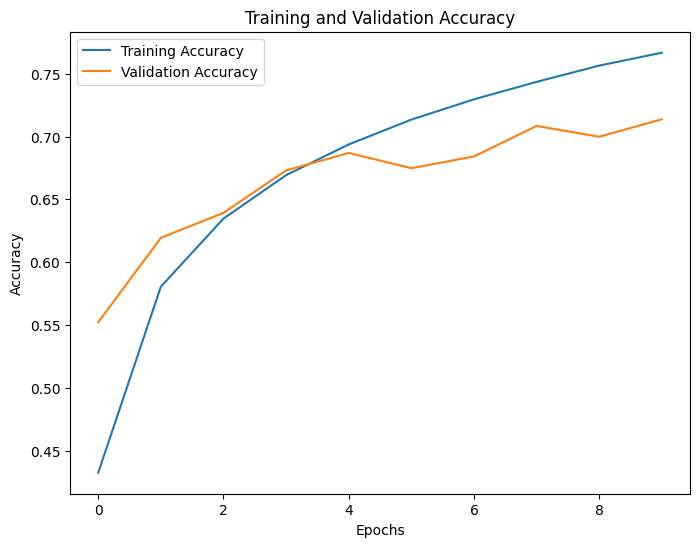

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Model Evaluation

In [10]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [11]:
predictions[9]

array([3.9822442e-04, 8.0500764e-01, 4.1679870e-03, 5.3373305e-04,
       4.7437165e-06, 3.5872476e-04, 1.5141375e-02, 6.6483203e-06,
       1.6403159e-03, 1.7274056e-01], dtype=float32)

In [12]:
import numpy as np
predictions = [np.argmax(arr) for arr in predictions]

In [13]:
y_tes = y_test.reshape(-1, )

In [14]:
predictions[3]

0

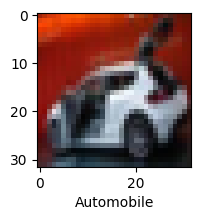

In [15]:
import matplotlib.pyplot as plt
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
def showImage(x, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[int(y[index])])

showImage(x_test, y_test, 6)

In [16]:
model.evaluate(x_test, y_test_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7186 - loss: 0.8548


[0.8630885481834412, 0.713699996471405]

# Classification Report

In [17]:
from sklearn.metrics import classification_report

In [18]:
y_test_labels = np.argmax(y_test_one_hot, axis=1)  
print(classification_report(y_test_labels, predictions))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1000
           1       0.82      0.85      0.84      1000
           2       0.68      0.54      0.61      1000
           3       0.50      0.57      0.53      1000
           4       0.61      0.73      0.66      1000
           5       0.62      0.60      0.61      1000
           6       0.76      0.81      0.78      1000
           7       0.76      0.77      0.76      1000
           8       0.86      0.77      0.81      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



# Confusion Matrix (Heatmap)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix = confusion_matrix(y_test_labels, predictions)

In [21]:
confusion_matrix

array([[709,  25,  53,  28,  46,  12,  12,  12,  58,  45],
       [ 14, 851,   4,  13,   7,   6,  13,   6,  18,  68],
       [ 50,   7, 543,  97, 112,  61,  70,  37,   9,  14],
       [  8,  13,  33, 569,  92, 165,  65,  37,   5,  13],
       [ 10,   0,  40,  61, 726,  36,  49,  66,   8,   4],
       [  9,   2,  44, 182,  67, 600,  27,  60,   2,   7],
       [  3,   5,  28,  67,  57,  18, 810,   6,   3,   3],
       [  8,   2,  26,  55,  66,  52,   7, 772,   2,  10],
       [ 63,  41,  17,  31,  20,   6,   8,   4, 768,  42],
       [ 23,  87,   7,  33,   3,   6,  10,  19,  23, 789]], dtype=int64)

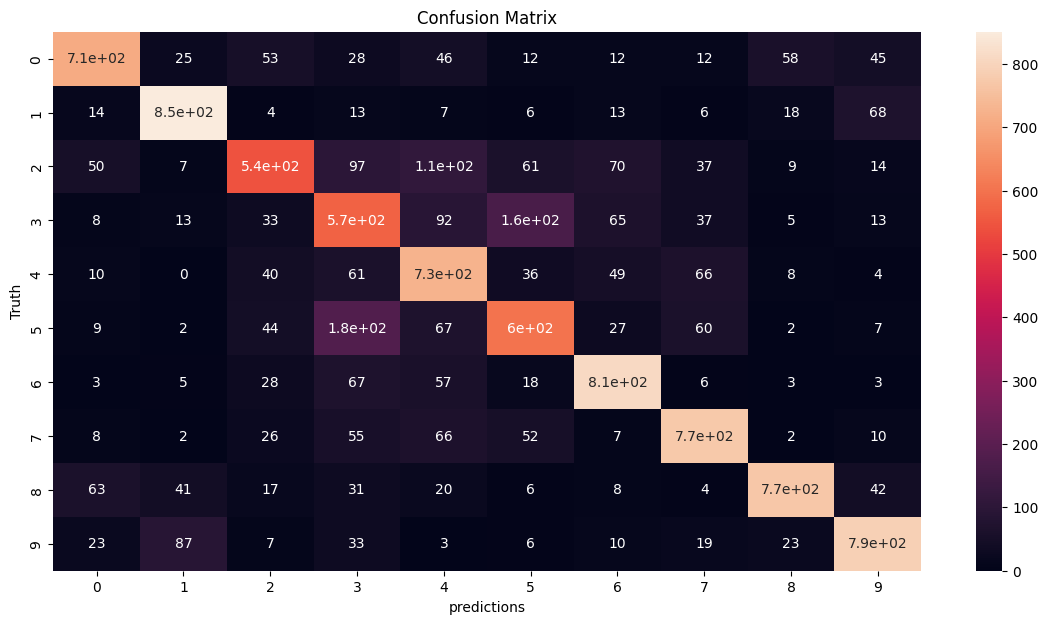

In [22]:
import seaborn as sns
plt.figure(figsize = (14,7))
sns.heatmap(confusion_matrix, annot = True)
plt.ylabel('Truth')
plt.xlabel('predictions')
plt.title('Confusion Matrix')
plt.show()

In [23]:
model.save('model.keras')